## El presente trabajo muestra como realizar una tarea mediante python, el codigo es completamente de mi autoria.

## Actividad 2. Área entre curvas

### Instrucciones: Desarrolla y resuelve los siguientes ejercicios.

* Dibuja en un esquema la región encerrada por las curvas de las funciones dadas.

* Decide si integrar con respecto a x o y.

* Dibuja un rectángulo típico de aproximación, marca su altura y su ancho.

* Calcula el área de la región de las siguientes funciones:

a) $y=e^x; \ \ y=x; \ \ \ \ \ x|[0,1]$

b) $y=x$; $y=3x$, $x+y=4$

c) f(x)= $-x^2 + 4x$; $g(x)=x^2 -6x+8$


## Desarrollo

Para la presente actividad decidi realizar las actividades en el ambiente de analitica de jupyter notebook, por lo que empezaremos por importar las bibliotecas para los calculos

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from tqdm import tqdm

### La funcion 'surface_in_curves' dibujara las funciones, y sombreara los intervalos entre ellas
Para ello posteriormente se deberan definir las funciones y(x) correspondientes de cada ejercicio

In [142]:
def surface_in_curves(delta_lines, num_square, begin, end, function):
    lapse=list(np.arange(begin-0.5, end+0.5, (end-begin )/delta_lines ) )
    lapse_surf = list(np.arange(begin, end, (end-begin)/delta_lines ) )

    x_par  = []
    y1_par = []
    y2_par = []
    y1_surf= []
    y2_surf= []

    for i in range(len(lapse)):
        y1_par.append( function(lapse[i], 1) )
        y2_par.append( function(lapse[i], 2) )
        if begin <=lapse[i]<= end:
            y1_surf.append( function(lapse[i], 1) )
            y2_surf.append( function(lapse[i], 2) )
            x_par.append(lapse[i])

#Graphication of the curves: 
    plt.figure()
    plt.plot(lapse,y1_par)
    plt.plot(lapse,y2_par)

    plt.plot(x_par,y1_surf)
    plt.plot(x_par,y2_surf)

    plt.gca().fill_between(x_par, y1_surf, y2_surf, facecolor='blue', alpha=0.25)
    
# if __name__== '__main__':
#     surface_in_curves(delta_lines, np.nan, begin, end, curve_e1)

### La funcion 'squares' convertira las funciones en intervalos para la integración mediante suma de Euler

In [105]:
def squares(lapse_surf, y1_surf, y2_surf,num_square,one_lapse):
    #print(len(lapse_surf))
    delta_square = (len(lapse_surf))//num_square
    #if (len(lapse_surf))%num_square != 0: num_square+=1
    
    square_y1=[]
    square_y2=[]
    integral = 0
    for i in range(num_square):
        y_min = y2_surf[i*delta_square+(delta_square//2)]
        y_max = y1_surf[i*delta_square+(delta_square//2)]
        for j in range(delta_square): square_y1.append( y_min )
        for j in range(delta_square): square_y2.append( y_max )
        integral += (y_max-y_min)*delta_square*one_lapse
    return(square_y1, square_y2, integral)
# if __name__=='__main__':
#     squares(lapse_surf, y1_surf, y2_surf, 10)

### La funcion 'surface_in_curves'  es la combinación de las funciones anteriores, graficara la suma de euler, y tambien entregara el valor de la integral en dicho metodo

In [145]:
def curves_squares(delta_lines, num_square, begin, end, function):
    lapse=list(np.arange(begin-0.5, end+0.5, (end-begin )/delta_lines ) )
    lapse_surf = list(np.arange(begin, end, (end-begin)/delta_lines ) )

    x_par  = []
    y1_par = []
    y2_par = []
    y1_surf= []
    y2_surf= []

    for i in range(len(lapse)):
        y1_par.append( function(lapse[i], 1) )
        y2_par.append( function(lapse[i], 2) )
        if begin <=lapse[i]<= end:
            y1_surf.append( function(lapse[i], 1) )
            y2_surf.append( function(lapse[i], 2) )
            x_par.append(lapse[i])

#Graphication of the curves: 
    plt.figure()
    plt.plot(lapse,y1_par)
    plt.plot(lapse,y2_par)

#     plt.plot(x_par,y1_surf)
#     plt.plot(x_par,y2_surf)
    plt.gca().fill_between(x_par, y1_surf, y2_surf, facecolor='blue', alpha=0.25)
    
    y1_fill, y2_fill, integral_value = squares(lapse_surf, y1_surf, y2_surf, num_square,(lapse_surf[1]-lapse_surf[0]) )
    plt.plot(lapse_surf[:len(y1_fill)], y1_fill)
    plt.plot(lapse_surf[:len(y1_fill)], y2_fill)
    
    plt.gca().fill_between(x_par[:len(y2_fill)], y1_fill, y2_fill, facecolor='orange', alpha=1.25)
    layer_integral= 'El valor de la integral es {}'.format(round(integral_value,4))
    plt.legend(['y1','y2','y1 de la integral', 'y2 de la integral',layer_integral])
    return(lapse_surf, y1_fill,y2_fill, integral_value)
# if __name__== '__main__':
#     x_integral, y1_f, y1_f, integral = curves_squares(1000, 25, 0, 1, curve_e1)
#     print(y1_f)
#     pass

## Resolución ejercicio 1
a) $y=e^x; \ \ y=x; \ \ \ \ \ x|[0,1]$


In [5]:
## Definimos las funciones
def curve_e1(x,option):
    if option == 1:        y=np.exp(x)
    else:                  y=x
    return(y)

<IPython.core.display.Javascript object>


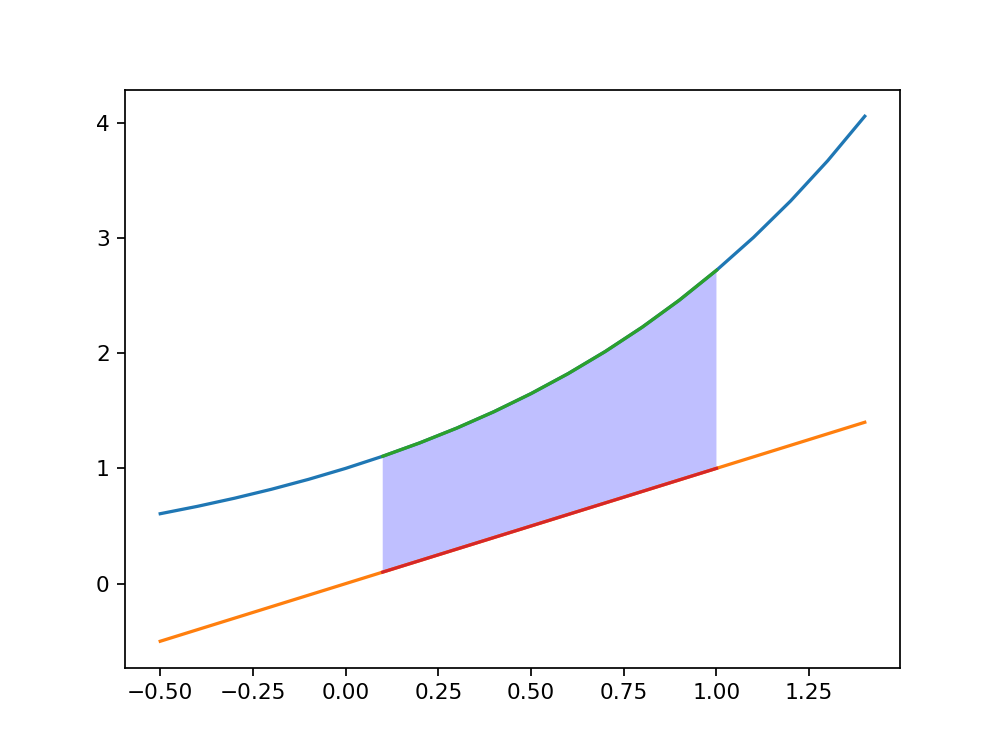

In [143]:
%matplotlib notebook
surface_in_curves(10, np.nan, 0, 1, curve_e1)

### Resolución de la integral:
$\displaystyle \int_0^1 e^x -x \ dx =  \int_0^1 e^x \ dx- \int_0^1x \ dx = e^x -\dfrac{x^2}{2}\Big|_0^1 = e^1 -\dfrac{1^2}{2}- \Big[ e^0 -\dfrac{0^2}{2} \Big] = e-\dfrac{1}{2}-1 \cong 2.71828  \cong 1.21828 $

<IPython.core.display.Javascript object>


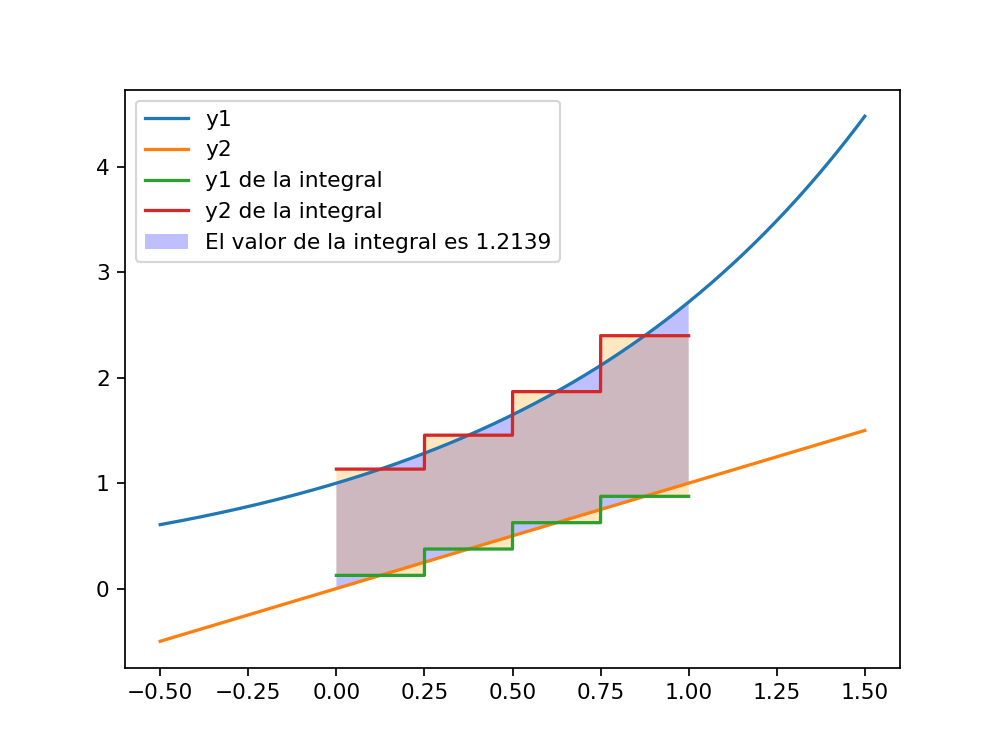

In [148]:
x_integral, y1_f, y2_f, integral = curves_squares(10000, 4, 0, 1, curve_e1)

<IPython.core.display.Javascript object>


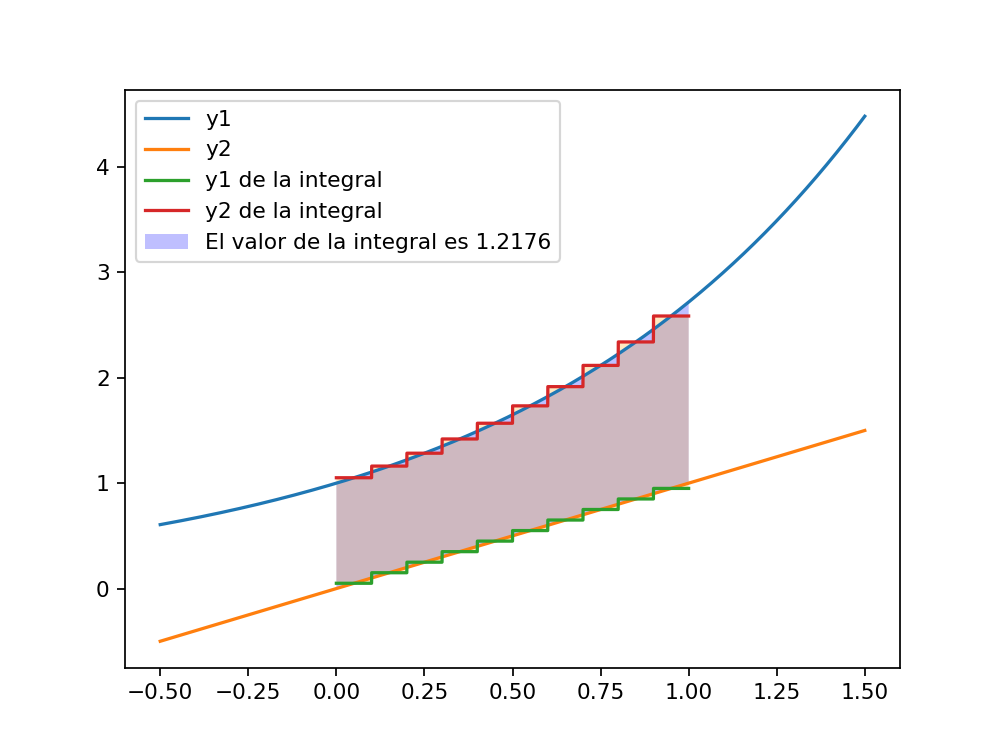

In [147]:
x_integral, y1_f, y2_f, integral = curves_squares(10000, 10, 0, 1, curve_e1)

<IPython.core.display.Javascript object>


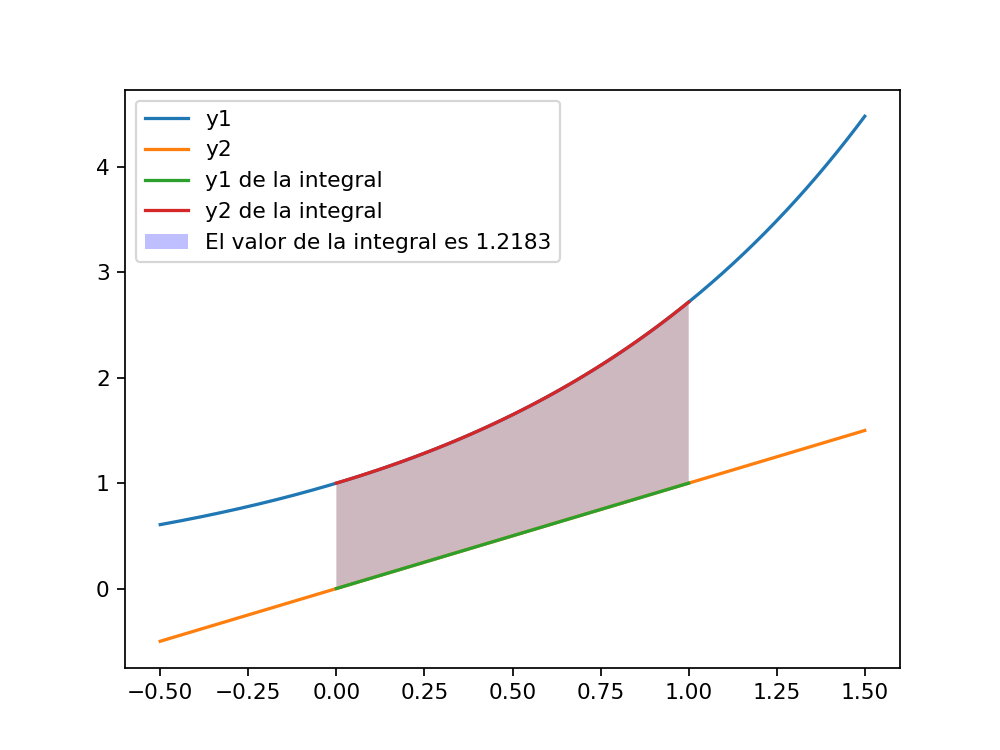

In [149]:
x_integral, y1_f, y2_f, integral = curves_squares(10000, 10000, 0, 1, curve_e1)

## Resolución ejercicio 2

b) $y1=x; \ \ \ \ \ \ \ \ y2=3x; \ \ \ \ \ \ \ \ x+y3=4$


### Resolución de la integral:
Sean $y1-x=0$; $y2-3x=0$, $y3+x=4$ y resolviendo el sistema de ecuaciones, mediante la suma de ellas:

Los puntos de interseccion seran en $y1=y2 \implies 2x=0 =y1=y2$; 

$y1=y3 \implies 2y=4\implies y=2$ sustituyendo en la ecuacion que contiene $y3 \implies 2+x=4 \implies x=2$

Y el ultimo en $y2=y3$ por lo que $4x=4 \implies x=1$ sustituyendo en $y2=3$

#### Al graficarlos tendremos:

<IPython.core.display.Javascript object>


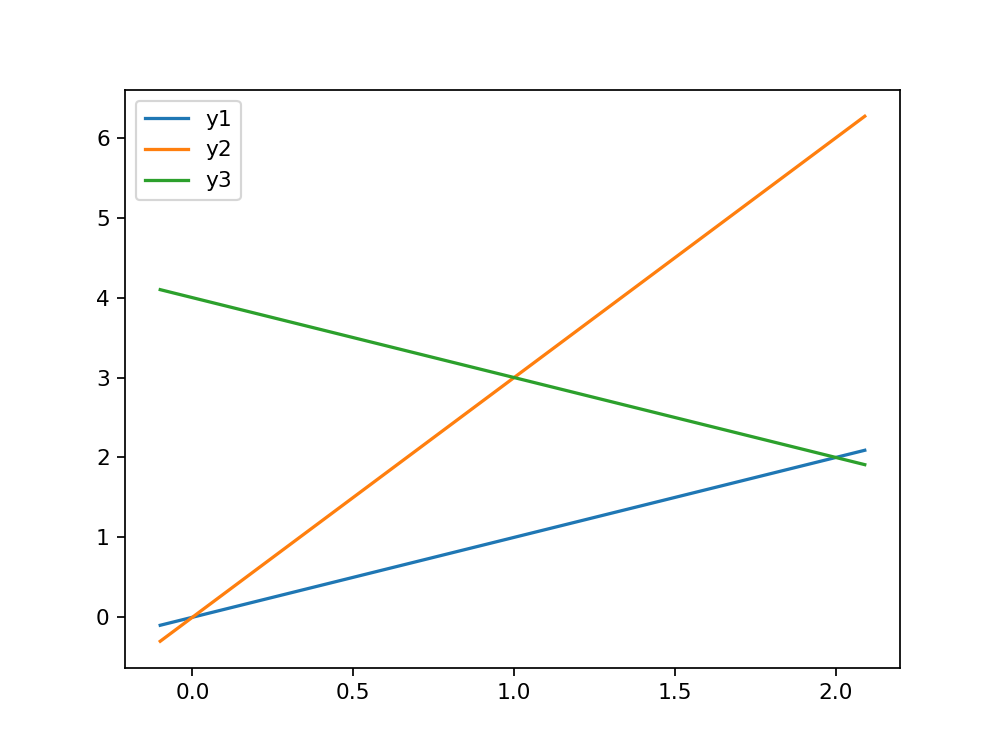

In [137]:
x  = np.arange(-0.1, 2.1, 0.01)
y1 = x
y2 = [i*3 for i in x ]
y3 = [4-i for i in x ]
plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(['y1','y2','y3'])
plt.show()

Por lo que observamos que los puntos de intersección que obtuvimos son correctos, procedremos entonces definir los intervalos:

 $f(x) = \left \{ \begin{matrix} y2 & \mbox{si }x \leqslant 1
\\ y3 & \mbox{si } x \geqslant 1 \end{matrix}\right. $

Teniendo entonces los puntos de intersección $[x,y]$ en $[0,0]; \ \ [2,2]; \ \ [1,3]$

Por lo que integraremos $\displaystyle \int_0^2f(x)-x \ dx = \ \ \ \int_0^1 3x \ dx +\int_1^2 \Big(4-x \Big) \ dx  + \int_0^2-x \ dx=$

$\dfrac{3 x^2}{2}\Big|_0^1 +\Big[4x - \dfrac{x^2}{2} \Big] \Big|_1^2 -\dfrac{x^2}{2}\Big|_0^2
=\ \ \ \ \dfrac{3}{2}- 0 +8-\dfrac{4}{2} -\Big[4 - \dfrac{1}{2}\Big] -\dfrac{4}{2} +0 = $

$\dfrac{3}{2}+8-\dfrac{8}{2} - 4 + \dfrac{1}{2}=  \ \ \ 4- \dfrac{4}{2}= 2 $

In [158]:
def curve_e2(x,option):
    if option == 2: y=x
    elif option==1:
        if x <=1:
            y=3*x
        else:y=4-x
    return(y)

<IPython.core.display.Javascript object>


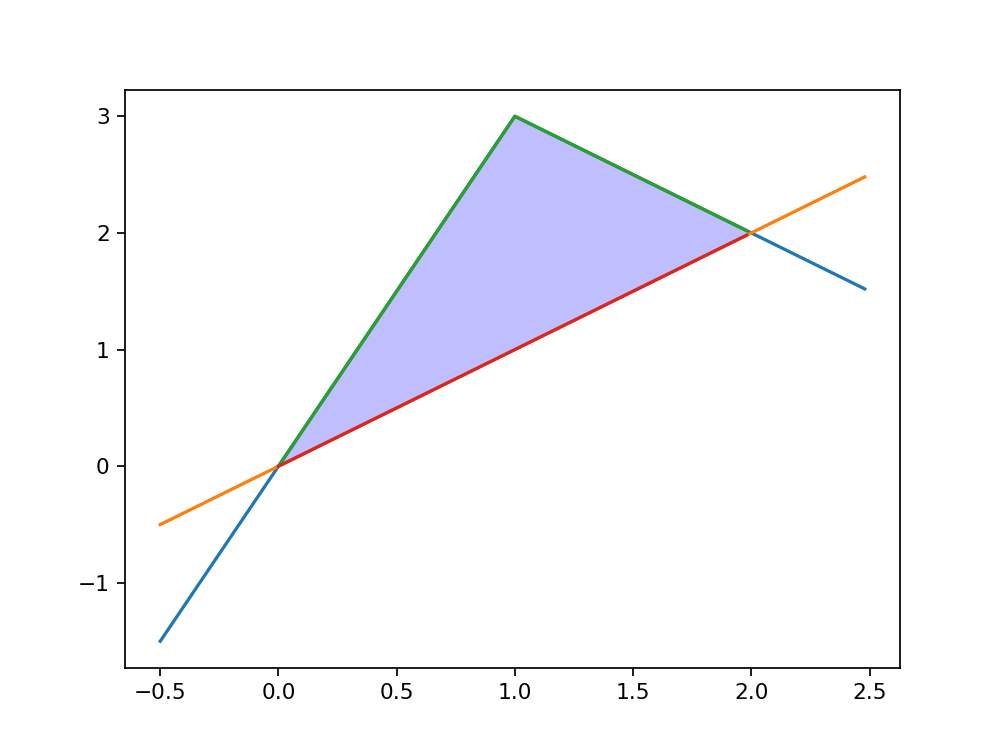

In [154]:
surface_in_curves(100, np.nan, 0, 2, curve_e2)

<IPython.core.display.Javascript object>


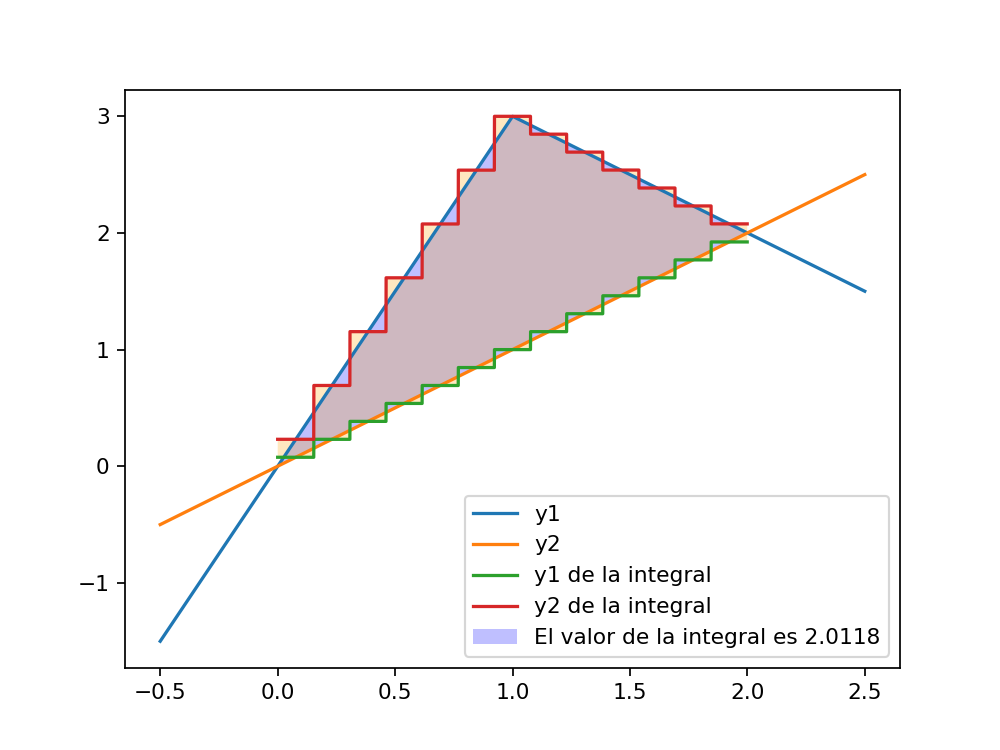

In [157]:
x_integral, y1_f, y1_f, integral = curves_squares(10000, 13, 0, 2, curve_e2)

<IPython.core.display.Javascript object>


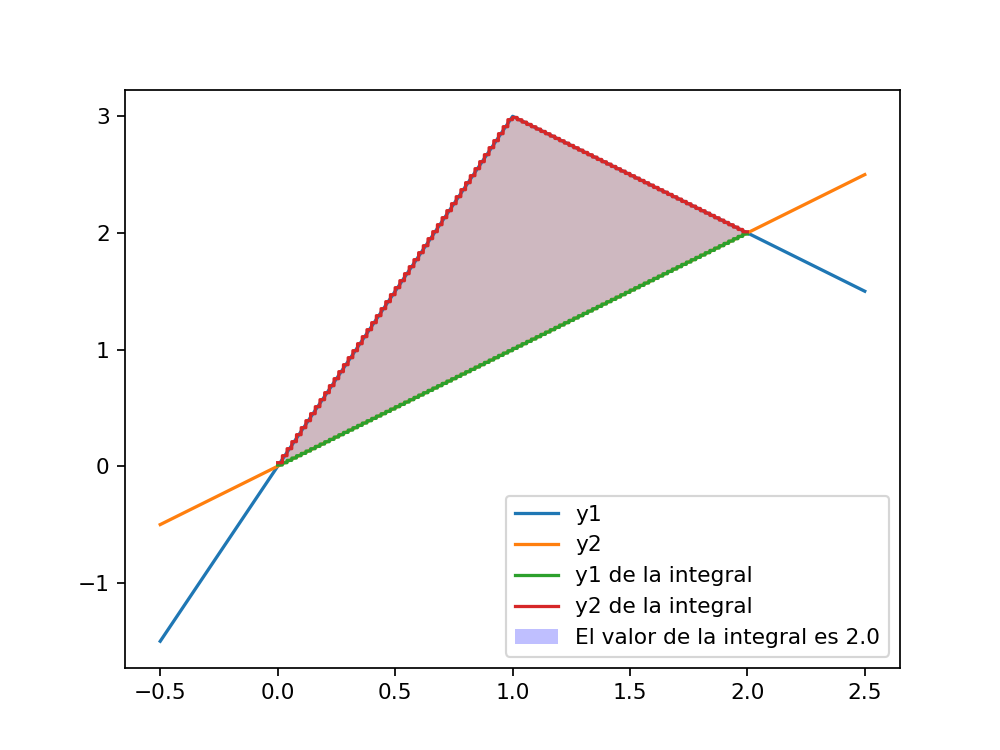

In [156]:
x_integral, y1_f, y1_f, integral = curves_squares(10000, 100, 0, 2, curve_e2)

## Resolución ejercicio 3

c) y1= $-x^2 + 4x;\ \ \ \ y2=x^2 -6x+8$

Por lo que los puntos de interseccion seran $y1=y2$ por lo tanto  $-x^2 + 4x = x^2 -6x+8$ entonces $2x^2 -10x +8=0 \implies x^2 -5x +4=0$ tendremos entonces que sus raices seran $(x-4)(x-1)=0$ por lo que los puntos en los que intersecta seran $x=4; \ \ \  x = 1$

Sabemos que $x^2$ en $y1$ es negativa, por lo que los extremos de la curva bajaran siendo este un maximo, siendo entonces la curva sera la superior

$\displaystyle \int_1^4 -\Big[x^2 -6x+8 \Big]dx + \Big[-x^2 + 4x \Big]dx =  \ \ \ \ -\displaystyle \int_1^4 \Big[2x^2 -10x+8 \Big]dx =$

$-\Big[ \dfrac{2x^3}{3}-5x^2+8x \Big] \Big|_1^4 =  \ \ \ \ - \dfrac{2(64)}{3}+80-32+ \dfrac{2}{3} -5 +8 =  \ \ \ \ -\dfrac{126}{3}+51 =  \ \ \ \ -42+51= \ \ \ \ 9$

In [161]:
def curve_e3(x,option):
    if option == 1:        y=-(x**2)+4*x
    elif option==2:        y=x**2-6*x+8
    return(y)

<IPython.core.display.Javascript object>


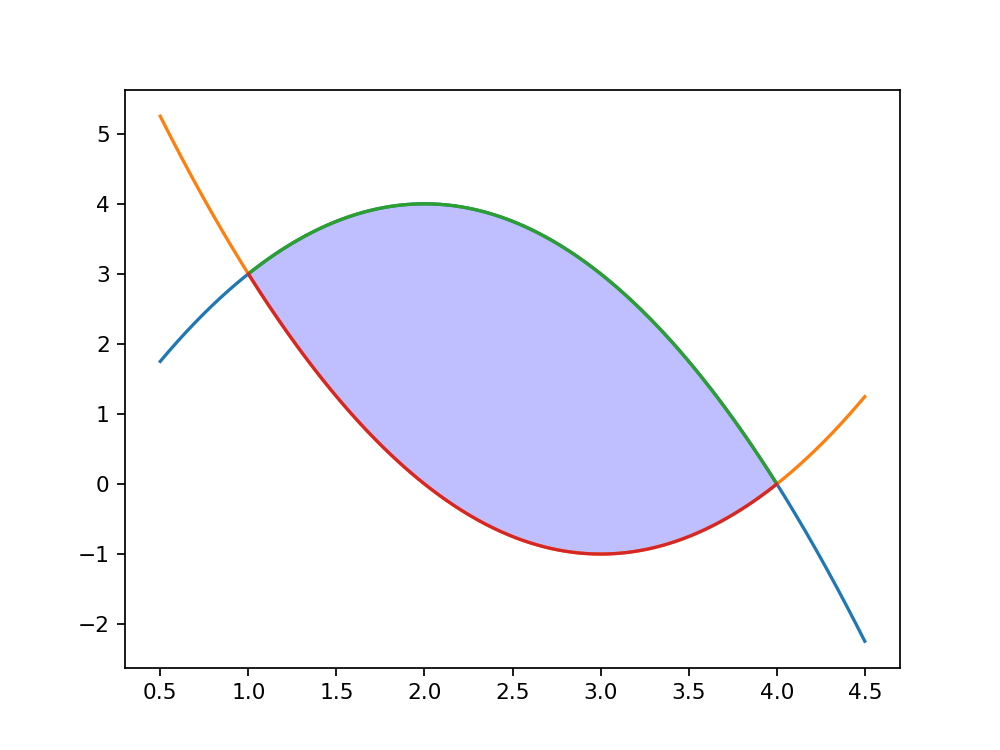

In [166]:
surface_in_curves(1000, np.nan, 1, 4, curve_e3)
#x_integral, y1_f, y1_f, integral = curves_squares(delta_lines, 25, begin, end, curve_e1)

<IPython.core.display.Javascript object>


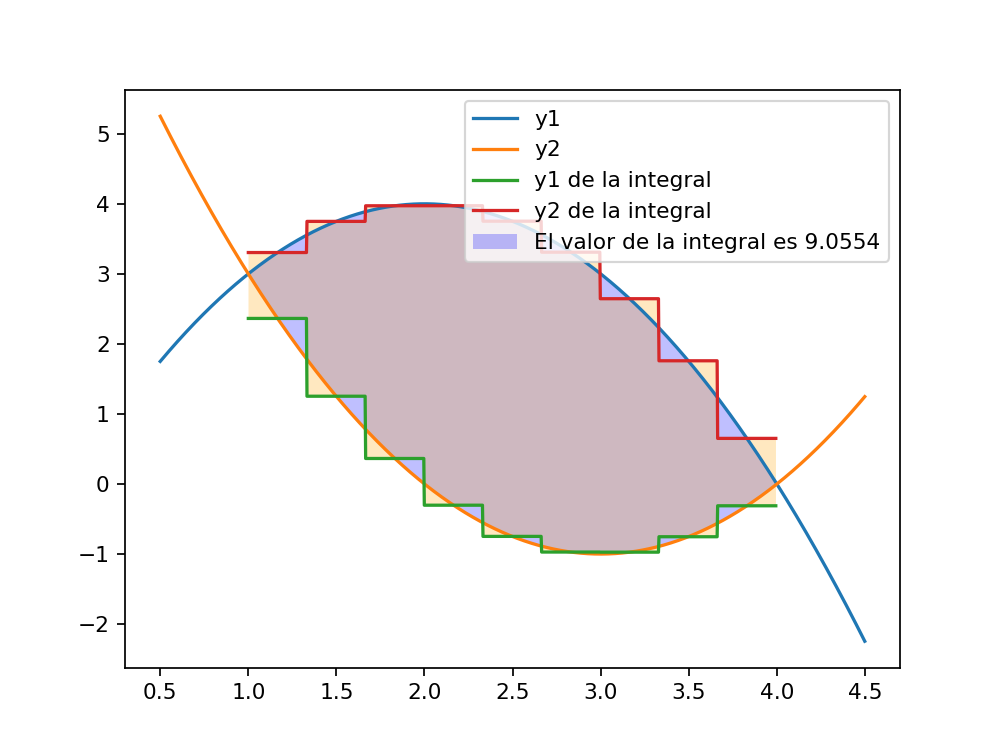

In [168]:
x_integral, y1_f, y1_f, integral = curves_squares(1000, 9, 1, 4, curve_e3)

<IPython.core.display.Javascript object>


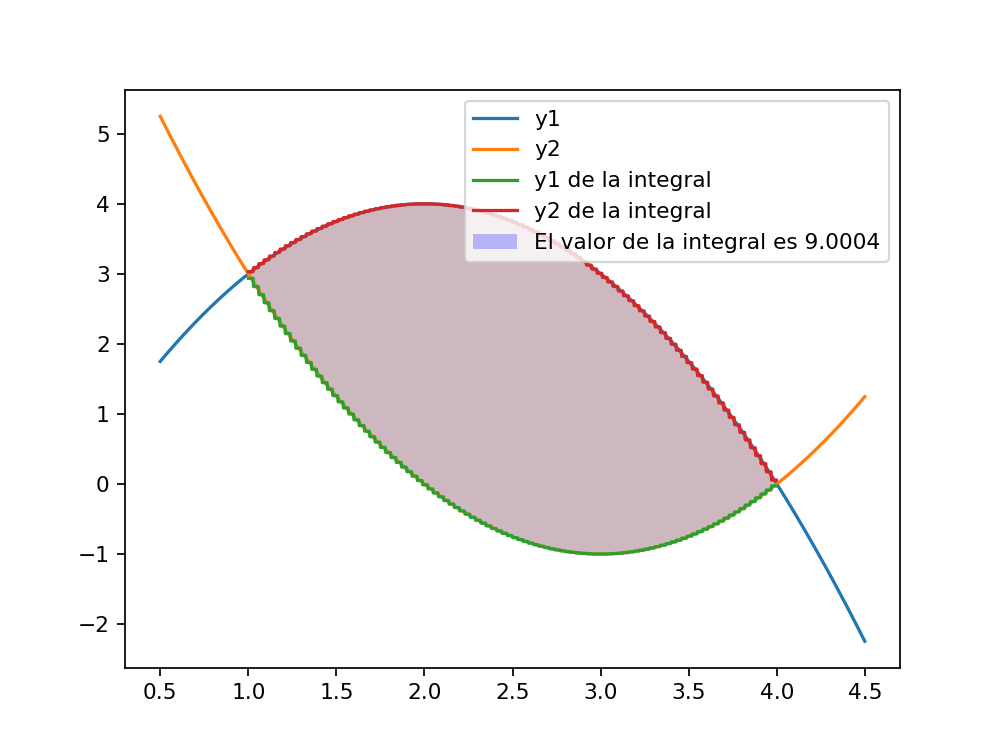

In [169]:
x_integral, y1_f, y1_f, integral = curves_squares(1000, 100, 1, 4, curve_e3)